In [42]:
# Import
%load_ext autoreload
%autoreload 2
# Methods from dataset.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataset import mergeForecastDataset
from dataset import addOutputDataset
from dataset import makeVisitor
from dataset import makeAtmosphere
from dataset import datasetCombine
from dataset import discretizeData
from dataset import encodingData


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# Orgnize dataset and combine it
from dataset import visitorProcess

# Merge the each forecast dataset to one csv file
mergeForecastDataset()
# Combine the forecast dataset to one csv file
addOutputDataset()
# Make the visitor dataset
makeVisitor()
# Make day of year data
visitorProcess()
# Make the atmosphere dataset
makeAtmosphere()
# Combine the all output datasets
datasetCombine()

      year  month  day  hour  forecast  value        date  addDate   timestamp
0     2009      1    1   200         4      0  2009-01-01        0  2009-01-01
1     2009      1    1   200         7      0  2009-01-01        0  2009-01-01
2     2009      1    1   200        10      0  2009-01-01        0  2009-01-01
3     2009      1    1   200        13      0  2009-01-01        0  2009-01-01
4     2009      1    1   500         4      0  2009-01-01        0  2009-01-01
...    ...    ...  ...   ...       ...    ...         ...      ...         ...
5467  2009      8   30  2300         4      0  2009-08-30        0  2009-08-30
5468  2009      8   30  2300         7      0  2009-08-30        0  2009-08-30
5469  2009      8   30  2300        10      0  2009-08-30        0  2009-08-30
5470  2009      8   30  2300        13      0  2009-08-30        0  2009-08-30
5471  2009      8   30  2300        16      5  2009-08-30        0  2009-08-30

[5472 rows x 9 columns]
      year  month  day  hou

/Users/seonghoonjeong/Desktop/School/3-1/DataScience/텀프/project/DataScienceTermProject/src/dataset.py:119: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  
/Users/seonghoonjeong/Desktop/School/3-1/DataScience/텀프/project/DataScienceTermProject/src/dataset.py:119: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  
/Users/seonghoonjeong/Desktop/School/3-1/DataScience/텀프/project/DataScienceTermProject/src/dataset.py:119: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  
/Users/seonghoonjeong/Desktop/School/3-1/DataScience/텀프/project/DataScienceTermProject/src/dataset.py:119: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  
/Users/seong

            date  sulfur_dioxide_min  sulfur_dioxide_max  sulfur_dioxide_mean  \
0     2008-10-01               0.003               0.004             0.003333   
1     2008-10-02               0.002               0.008             0.004000   
2     2008-10-03               0.004               0.008             0.005042   
3     2008-10-04               0.004               0.008             0.005875   
4     2008-10-05               0.005               0.009             0.006458   
...          ...                 ...                 ...                  ...   
3946  2020-01-27                 NaN                 NaN                  NaN   
3947  2020-01-28                 NaN                 NaN                  NaN   
3948  2020-01-29                 NaN                 NaN                  NaN   
3949  2020-01-30                 NaN                 NaN                  NaN   
3950  2020-01-31                 NaN                 NaN                  NaN   

      sulfur_dioxide_median

In [44]:
# Data description
df = pd.read_csv('assets/output/datasetCombine.csv')

print("combine dataset describe:")
print(df.describe())

print('number of null value:')
print(df.isna().sum())

combine dataset describe:
       sulfur_dioxide_min  sulfur_dioxide_max  sulfur_dioxide_mean  \
count         3889.000000         3889.000000          3889.000000   
mean             0.003175            0.006899             0.004596   
std              0.001772            0.004804             0.002757   
min              0.000000            0.001000             0.001000   
25%              0.002000            0.004000             0.002750   
50%              0.003000            0.006000             0.003955   
75%              0.004000            0.009000             0.005542   
max              0.018000            0.070000             0.024458   

       sulfur_dioxide_median  carbon_monoxide_min  carbon_monoxide_max  \
count            3889.000000          3900.000000          3900.000000   
mean                0.004439             0.437077             0.867154   
std                 0.002710             0.174039             0.434332   
min                 0.001000             0.0000

In [45]:
# Cleaning Dirty data

df = pd.read_csv('assets/output/datasetCombine.csv')

df.dropna(axis=0, inplace=True)
print(df.isna().sum())

df.to_csv('assets/output/dirtydataResult.csv', index=False)



date                                   0
sulfur_dioxide_min                     0
sulfur_dioxide_max                     0
sulfur_dioxide_mean                    0
sulfur_dioxide_median                  0
carbon_monoxide_min                    0
carbon_monoxide_max                    0
carbon_monoxide_mean                   0
carbon_monoxide_median                 0
ozone_min                              0
ozone_max                              0
ozone_mean                             0
ozone_median                           0
nitrogen_dioxide_min                   0
nitrogen_dioxide_max                   0
nitrogen_dioxide_mean                  0
nitrogen_dioxide_median                0
fine_dust_pm10_min                     0
fine_dust_pm10_max                     0
fine_dust_pm10_mean                    0
fine_dust_pm10_median                  0
rainfall_min                           0
rainfall_max                           0
rainfall_mean                          0
rainfall_median 

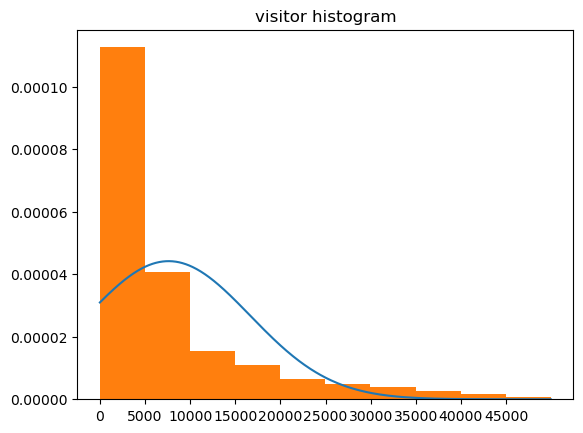

In [46]:
# visitor histogram
from scipy import stats

df['visitor'] = df['visitor'].str.replace(',', '').astype(int)
df = df[df['visitor'] < 50000]

mean = np.mean(df['visitor'])
std = np.std(df['visitor'])
pdf = stats.norm.pdf(df['visitor'].sort_values(), mean, std)

plt.title('visitor histogram')
plt.plot(np.sort(df['visitor']), pdf)
plt.hist(df['visitor'], density=True)
plt.xticks(np.arange(0, 50000,5000))
plt.show()

In [47]:
# Outlier detection
df = pd.read_csv('assets/output/dirtydataResult.csv')
df['visitor'] = df['visitor'].str.replace(',', '').astype(int)

# Drop the outlier(condition : visitor > 30000)
df.drop(df[df['visitor'] > 30000].index, inplace=True)
print(df.describe())

#Write result
df.to_csv('assets/output/outlierResult.csv', index=False)

       sulfur_dioxide_min  sulfur_dioxide_max  sulfur_dioxide_mean  \
count         2468.000000         2468.000000          2468.000000   
mean             0.003045            0.006214             0.004228   
std              0.001668            0.004461             0.002576   
min              0.000000            0.001000             0.001000   
25%              0.002000            0.003000             0.002583   
50%              0.003000            0.005000             0.003542   
75%              0.004000            0.008000             0.004958   
max              0.018000            0.039000             0.024458   

       sulfur_dioxide_median  carbon_monoxide_min  carbon_monoxide_max  \
count            2468.000000          2468.000000          2468.000000   
mean                0.004080             0.453930             0.859360   
std                 0.002532             0.183944             0.441711   
min                 0.001000             0.000000             0.100000   

In [48]:
# Encoding, Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

discretizeData()
encodingData(StandardScaler())

In [49]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

df = pd.read_csv('assets/output/encodingResult.csv')

X = df.drop(['visitor', 'date'], axis=1)
Y = df['visitor']
date = df['date']

# Select 40 features using SelectKBest
selector = SelectKBest(f_regression,k=40)
X_new = selector.fit_transform(X, Y)
print(X_new.shape)

df = pd.DataFrame(X_new, columns=[X.columns[selector.get_support()]])
df = pd.concat([date, df, Y], axis=1)

df.to_csv('assets/output/featureSelectionResult.csv', index=False)

(2468, 40)


In [50]:
# # Read dataset and split to train and test data
from sklearn.model_selection import train_test_split

# Read the csv file to pandas dataframe
dataset = pd.read_csv('assets/output/featureSelectionResult.csv')
print(dataset)

# Split the dataset to X and Y
Y = dataset.loc[:,'visitor']
X = dataset.drop(['date','visitor'], axis=1)

# Split the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

            date  ('sulfur_dioxide_min',)  ('sulfur_dioxide_mean',)  \
0     2009-01-03                 8.369077                  6.901730   
1     2009-01-04                 7.169642                  7.014996   
2     2009-01-06                 8.968795                  6.853187   
3     2009-01-07                 2.371899                  5.218912   
4     2009-01-10                -0.626691                 -0.412056   
...          ...                      ...                       ...   
2463  2019-12-27                 1.772181                  0.688248   
2464  2019-12-28                 1.172463                  0.299905   
2465  2019-12-29                -0.026973                 -0.476780   
2466  2019-12-30                -0.026973                 -0.476780   
2467  2019-12-31                -0.626691                 -0.865122   

      ('sulfur_dioxide_median',)  ('carbon_monoxide_min',)  \
0                       7.079169                  0.250506   
1                      

In [51]:
# Declare the GradientBosstingRegressor model
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, Y_train)

# Print score of the model
print(model.score(X_test, Y_test))

0.4333474994613863


In [52]:
# Make the GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Hyperparameteres
grid_params = {'n_estimators': np.arange(100,300, 50),
               'max_depth' : np.arange(1, 5, 1),
               'learning_rate': [ 0.001, 0.01, 0.1]
        }

# Declare the GridSearch model
grid_model = GridSearchCV(model, param_grid=grid_params, cv=10, n_jobs=-1)

In [53]:
# Fit the model
from sklearn.metrics import mean_squared_error

grid_model.fit(X_train, Y_train)

print('최적 하이퍼 파라미터:\n', grid_model.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_model.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
최고 예측 정확도: 0.5243


In [54]:
# Define the model with best parameters

model = GradientBoostingRegressor(**grid_model.best_params_, random_state=0)

#Train the model and print score
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))


0.44438866379546615


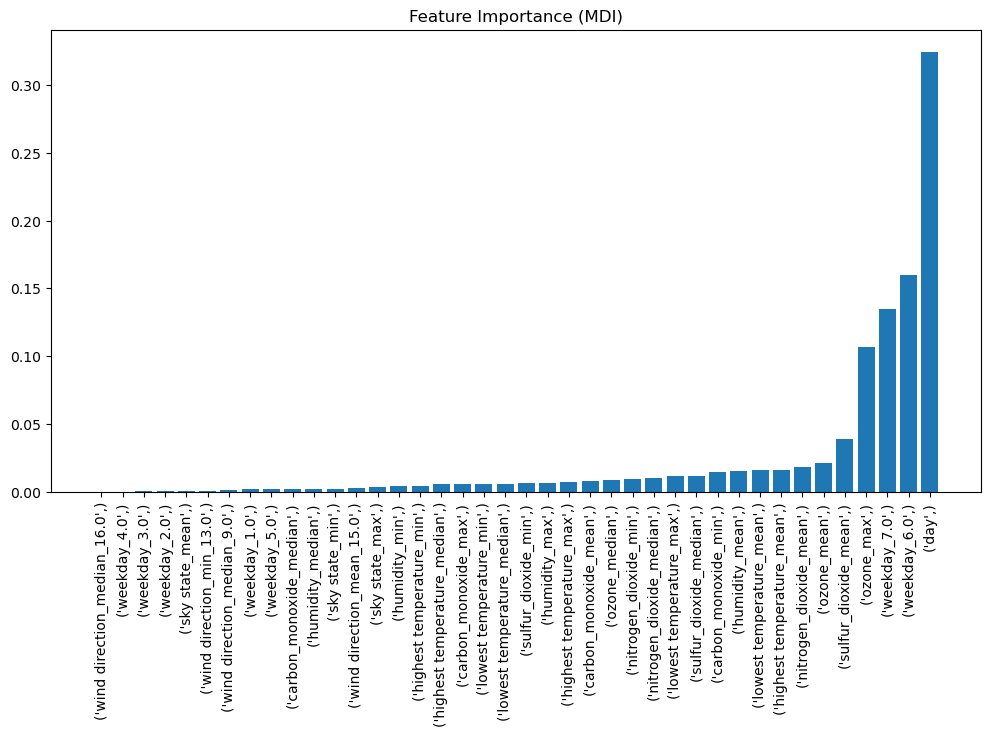

In [55]:
# Plot the feature importance
from sklearn.inspection import permutation_importance

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.bar(pos, feature_importance[sorted_idx], align="center")
plt.xticks(pos, np.array(X_train.columns)[sorted_idx], rotation = 90)
plt.title("Feature Importance (MDI)")
plt.show()

In [56]:
# Evaluate the model using KFold
from sklearn.model_selection import KFold

dataset = pd.read_csv('assets/output/featureSelectionResult.csv')

# Split the dataset to X and Y
Y = dataset.loc[:,'visitor']
X = dataset.drop(['date','visitor'], axis=1)

# Declare the GradientBosstingRegressor model and KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

best_params = grid_model.best_params_
kfold_model = GradientBoostingRegressor(**best_params, random_state=0)

# Iterate the KFold and print the score
cv_accuracy=[]
n_iter = 0
for train_index, test_index in kfold.split(X):
  # Extract train, test data using the index returned by kfold.split()
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = Y[train_index], Y[test_index]
  # Train and predcit
  kfold_model.fit(X_train, y_train)
  pred = kfold_model.predict(X_test)
  n_iter += 1
  # measure accuracy
  accuracy = np.round(model.score(X_test, y_test), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  cv_accuracy.append(accuracy)
# Calculate mean accuracy
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.5003, 학습 데이터 크기: 2221, 검증 데이터 크기: 247

#2 교차 검증 정확도 :0.3752, 학습 데이터 크기: 2221, 검증 데이터 크기: 247

#3 교차 검증 정확도 :0.7837, 학습 데이터 크기: 2221, 검증 데이터 크기: 247

#4 교차 검증 정확도 :0.7861, 학습 데이터 크기: 2221, 검증 데이터 크기: 247

#5 교차 검증 정확도 :0.8146, 학습 데이터 크기: 2221, 검증 데이터 크기: 247

#6 교차 검증 정확도 :0.7929, 학습 데이터 크기: 2221, 검증 데이터 크기: 247

#7 교차 검증 정확도 :0.7597, 학습 데이터 크기: 2221, 검증 데이터 크기: 247

#8 교차 검증 정확도 :0.7563, 학습 데이터 크기: 2221, 검증 데이터 크기: 247

#9 교차 검증 정확도 :0.8038, 학습 데이터 크기: 2222, 검증 데이터 크기: 246

#10 교차 검증 정확도 :0.7833, 학습 데이터 크기: 2222, 검증 데이터 크기: 246

## 평균 검증 정확도: 0.71559
